In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Задание 1 из ДЗ

In [4]:
runs = pd.read_excel('./data/Vyborki_LR_3.xls')
display(runs)

,Вариант 1,1,2,3,4,5,6,7,Вариант 2,1.1,2.1,3.1,4.1,5.1,6.1,7.1
0,NaN,-2.488,6.318,3,9.223,0.604,1.0,1.0,NaN,-0.108,7.373,5.0,3.399,0.155,2.0,2.0
1,NaN,1.099,7.149,1,2.746,0.405,1.0,0.0,NaN,0.885,6.478,2.0,2.749,0.305,2.0,2.0
2,NaN,2.127,7.929,2,7.489,0.158,6.0,5.0,NaN,0.320,5.356,4.0,3.071,0.458,5.0,0.0
3,NaN,3.664,3.838,0,7.191,0.248,3.0,15.0,NaN,1.013,8.544,3.0,6.221,0.457,5.0,1.0
4,NaN,3.895,-1.578,1,3.230,0.151,2.0,9.0,NaN,-0.051,9.697,4.0,3.153,0.813,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Определение параметров выборок и типа распределения

In [5]:
clean_run1 = runs['1'][runs['1'].notna()]
clean_run2 = runs['2'][runs['2'].notna()]
clean_run3 = runs['3'][runs['3'].notna()]
clean_run4 = runs['4'][runs['4'].notna()]
clean_run5 = runs['5'][runs['5'].notna()]
clean_run6 = runs['6'][runs['6'].notna()]
clean_run7 = runs['7'][runs['7'].notna()]


In [6]:
a = np.array([1,2,3])
b = a * 3
print(b)

[3 6 9]


Длина выборки №1 505 с оценкой мат. ожидания 1.9897504950495049 и дисперсией 8.76433994556027
Выборка № 1 является непрерывной количественной СВ.


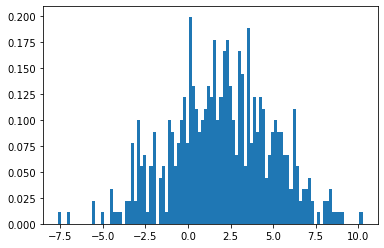

Гипотиза H0 - выборка задана нормальным распределением с мат. ожиданием 1.9897504950495049 и СКО 2.9604627924634133
Проверим гипотизу с помощью критерия Пирсона.
Величина критерия равна - 23.474756341774327, а вероятность верности гипотезы - 99.99999999999997%


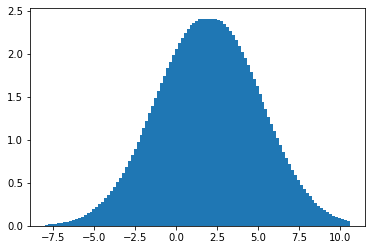

In [7]:
bins_number = 100
x_min = clean_run1.min()
x_max = clean_run1.max()
step = (x_max - x_min)/bins_number

print(f'Длина выборки №1 {len(clean_run1)} с оценкой мат. ожидания {clean_run1.mean()} и дисперсией {clean_run1.var()}' )
print(f'Выборка № 1 является непрерывной количественной СВ.')
plt.hist(clean_run1, bins_number, density=True, stacked=True)
plt.show()
res = stats.relfreq(clean_run1, numbins=bins_number)
observed_freqs = res.frequency * bins_number
#print(observed_freqs)
#a = stats.norm.fit(clean_run1, loc=clean_run1.mean(), scale=clean_run1.std())
#print(a)
# Найти вероятности на 100 интервалах от x_min до x_max с mu=1.99 и var=8.764
# Вычислить сумму отклонений наблюдаемой частоты от теоретической на всех интервалах и сравнить со значением chi**2 из таблицы
# Вероятность на интервале cdf(lower)-cdf(higher)
# cdf - вероятность, pdf - плотность
normal_dist = stats.norm(loc=clean_run1.mean(), scale=clean_run1.std())
mid_value = x_min + step/2.
#print(x_min, x_max, step, mid_value)
expected_freqs = []
#print(normal_dist.cdf(x_min+step) - normal_dist.cdf(x_min))
range_lower = x_min
range_higher = x_min + step
for a in range(0,bins_number):
    expected_freqs.append(normal_dist.cdf(range_higher) - normal_dist.cdf(range_lower))
    range_lower += step
    range_higher += step
expected_freqs = np.array(expected_freqs)
expected_freqs = expected_freqs * bins_number
#print(expected_freqs)
#print(f'{expected_freqs[50]} {observed_freqs[50]}')
print(f'Гипотиза H0 - выборка задана нормальным распределением с мат. ожиданием {clean_run1.mean()} и СКО {clean_run1.std()}')
x_ = [x_min + step/2.0 + i*step for i in range(0,bins_number)]
plt.bar(x_, expected_freqs)
print('Проверим гипотизу с помощью критерия Пирсона.')
chisq_test_result = stats.chisquare(observed_freqs, f_exp = expected_freqs)
print(f'Величина критерия равна - {chisq_test_result.statistic}, а вероятность верности гипотезы - {chisq_test_result.pvalue*100}%')
# "Ручное" вычисление значения критерия Пирсона
#chi_res = 0.0
#for i in range(0,len(expected_freqs)-1):
#    chi_res += (observed_freqs[i]-expected_freqs[i])**2/expected_freqs[i]
#print(chi_res)




-13.499444760239701 12.743650405400992 0.5248619033128139
12.743650405400992
Длина выборки №2 496 с оценкой мат. ожидания -0.37789717741935486 и СКО 7.57572902912581
Выборка №2 является непрерывной количественной СВ.
Гипотиза H0 - выборка задана однородным распределением с a=-13.499444760239701 и b=12.743650405400992


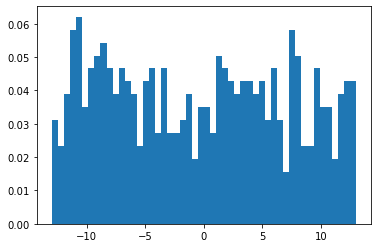

Проверим гипотизу с помощью критерия Пирсона.
Величина критерия равна - 39.98137437506123, а вероятность верности гипотезы - 81.73481636244128%


In [8]:
id = 2
run = clean_run2
calc_std = run.std()
calc_mean = run.mean()
bins_number = 50
x_min = calc_mean-3**0.5*calc_std
x_max = calc_mean+3**0.5*calc_std
step = (x_max - x_min)/bins_number
print(x_min, x_max, step)
print(calc_mean + 3**0.5*calc_std)

print(f'Длина выборки №{id} {len(run)} с оценкой мат. ожидания {calc_mean} и СКО {calc_std}')
print(f'Выборка №{id} является непрерывной количественной СВ.')
print(f'Гипотиза H0 - выборка задана однородным распределением с a={x_min} и b={x_max}')
plt.hist(run, bins_number, density=True, stacked=True)
plt.show()

# Частоты для оценки параметров однородного распределения вычисляются по-другому.
res = stats.relfreq(clean_run1, numbins=bins_number)
observed_freqs = res.frequency * bins_number
#print(observed_freqs)
print('Проверим гипотизу с помощью критерия Пирсона.')
#uform = stats.uniform(x_min, x_max-x_min)
uform_dist = stats.uniform(x_min, x_max-x_min)
#print(uform.cdf(x_min+step)-uform.cdf(x_min))
range_lower = x_min
range_higher = x_min + step
expected_freqs = []
for a in range(0, bins_number):
    expected_freqs.append(uform_dist.cdf(range_higher) - uform_dist.cdf(range_lower))
    range_lower += step
    range_higher += step
expected_freqs = np.array(expected_freqs)
expected_freqs = expected_freqs * bins_number
#print(expected_freqs)
#expected_freqs = [(uform.cdf(x_min+step)-uform.cdf(x_min)) * bins_number] * bins_number
#expected_freqs = calc_mean + 3**0.5*calc_std
#print(expected_freqs)
chisq_test_result = stats.chisquare(observed_freqs, f_exp = expected_freqs)
print(f'Величина критерия равна - {chisq_test_result.statistic}, а вероятность верности гипотезы - {chisq_test_result.pvalue*100}%')


Длина выборки №3 1003 с оценкой мат. ожидания 2 и дисперсией 1.2920340774084933
Выборка № 3 является дискретной категориальной СВ.


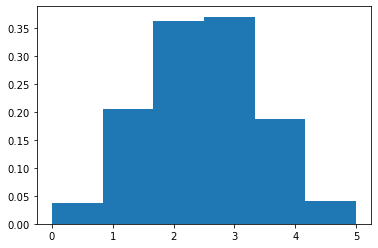

In [9]:
calc_variance3 = clean_run3.var()
calc_mean3 = int(round(clean_run3.mean()))
print(f'Длина выборки №3 {len(clean_run3)} с оценкой мат. ожидания {calc_mean3} и дисперсией {calc_variance3}')
print(f'Выборка № 3 является дискретной категориальной СВ.')
bins_number3 = len(clean_run3.value_counts())
plt.hist(clean_run3, bins_number3, density=True, stacked=True)
plt.show()

Длина выборки №4 395 с оценкой мат. ожидания 6.176179746835443 и дисперсией 14.262011020908563
Выборка №4 является дискретной количественной СВ.


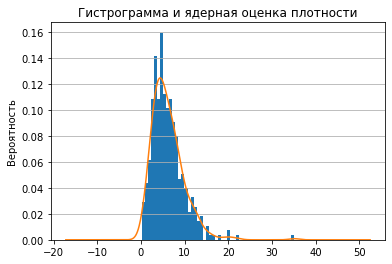

In [10]:
id = 4
run = clean_run4
calc_variance = run.var()
calc_mean = run.mean()
bins_number = 50
fig, ax = plt.subplots()
run.plot.hist(bins=bins_number, density=True, stacked=True)
run.plot.kde(ax=ax, legend=False, title='Гистрограмма и ядерная оценка плотности')
ax.set_ylabel('Вероятность')
ax.grid(axis='y')
print(f'Длина выборки №{id} {len(run)} с оценкой мат. ожидания {calc_mean} и дисперсией {calc_variance}')
print(f'Выборка №{id} является дискретной количественной СВ.')

plt.show()

0.1929072209174312
Длина выборки №5 545 с оценкой мат. ожидания 0.1929072209174312 и СКО 0.1916605947365964
Выборка №5 является непрерывной количественной СВ.
Гипотиза H0 - выборка задана однородным распределением с lambda=0.1929072209174312


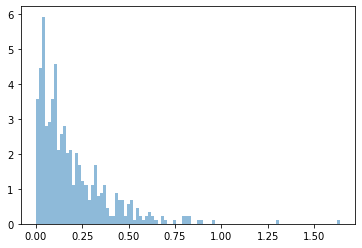

0.0 1.639 0.016390000000000002
Проверим гипотизу с помощью критерия Пирсона.
Величина критерия равна - 36.59482555373048, а вероятность верности гипотезы - 99.9999998734846%


In [37]:
id = 5
run = clean_run5
calc_std = run.std()
calc_mean = run.mean()
bins_number = 100
# Оценка для lambda = 1/мат. ожидание
calc_lambda = calc_mean
print(calc_lambda)
print(f'Длина выборки №{id} {len(run)} с оценкой мат. ожидания {calc_mean} и СКО {calc_std}')
print(f'Выборка №{id} является непрерывной количественной СВ.')
print(f'Гипотиза H0 - выборка задана однородным распределением с lambda={calc_lambda}')
plt.hist(run, bins_number, density=True, stacked=True, alpha=0.5)
plt.show()

x_min = 0.0
x_max = run.max()
step = (x_max - x_min)/bins_number
print(x_min, x_max, step)

# Частоты для оценки параметров однородного распределения вычисляются по-другому.
res = stats.relfreq(run, numbins=bins_number)
observed_freqs = res.frequency * bins_number
#print(observed_freqs)
print('Проверим гипотизу с помощью критерия Пирсона.')
expon_dist = stats.expon(scale=calc_lambda)
#print(expon_dist.cdf(x_min+step)-expon_dist.cdf(x_min))
range_lower = x_min
range_higher = x_min + step
expected_freqs = []
for a in range(0, bins_number):
    expected_freqs.append(expon_dist.cdf(range_higher) - expon_dist.cdf(range_lower))
    range_lower += step
    range_higher += step
expected_freqs = np.array(expected_freqs)
expected_freqs = expected_freqs * bins_number
#print(expected_freqs)
chisq_test_result = stats.chisquare(observed_freqs, f_exp = expected_freqs)
print(f'Величина критерия равна - {chisq_test_result.statistic}, а вероятность верности гипотезы - {chisq_test_result.pvalue*100}%')

#x_ = [x_min + step/2.0 + i*step for i in range(0,bins_number)]
#plt.bar(x_, expected_freqs)
#plt.show()

Длина выборки №6 562 с оценкой мат. ожидания 3.0622775800711746 и дисперсией 3.0388953381417267
Выборка №6 является дискретной количественной СВ.


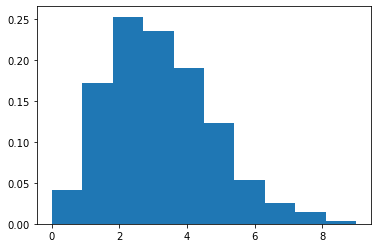

In [63]:
id = 6
run = clean_run6
calc_variance = run.var()
calc_mean = run.mean()
bins_number = len(run.value_counts())
print(f'Длина выборки №{id} {len(run)} с оценкой мат. ожидания {calc_mean} и дисперсией {calc_variance}')
print(f'Выборка №{id} является дискретной категориальной СВ.')
plt.hist(run, bins_number, density=True, stacked=True)
plt.show()

Длина выборки №7 599 с оценкой мат. ожидания 4 и дисперсией 18.026208675551786
Выборка №7 является дискретной категориальной СВ.


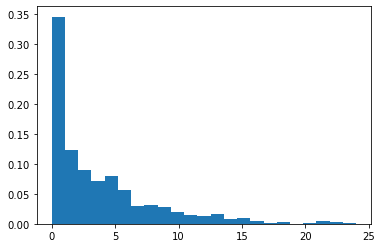

In [67]:
id = 7
run = clean_run7
calc_variance = run.var()
calc_mean = int(round(run.mean()))
bins_number = len(run.value_counts())
print(f'Длина выборки №{id} {len(run)} с оценкой мат. ожидания {calc_mean} и дисперсией {calc_variance}')
print(f'Выборка №{id} является дискретной категориальной СВ.')
print(f'Выборка №{id} подчиняется распределению Пуассона.')
plt.hist(run, bins_number, density=True, stacked=True)
plt.show()